# Titanic: Machine Learning from Disaster

## 导入工具和读入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = 'all'     

In [2]:
train = pd.read_csv(r'dataset\train.csv')
test = pd.read_csv(r'dataset\test.csv')

## 查看数据集整体信息

In [3]:
train.head()
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.describe()
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

- 输出信息还是比较多的，能看出train和test数据形式是一样的，其中train的第二列是Survived标签
- 有一些数据缺失，如Age、Cabin、Embarked，还有test里Fare列缺一个数据，这些之后需要相应的处理

## 探索数据特征

###  Pclass 船票的等级
- 从结果可以看出，船票等级是一个相当有分量的特征，等级的高低和存活率有明显的相关性

In [6]:
train['Pclass'].value_counts()
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

3    491
1    216
2    184
Name: Pclass, dtype: int64

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Name 姓名
- 名字891个没有重复，输出几个名字来看一下
- 其实一般来讲名字不能算特征，但这里面的名字还真有一些特征：
 1. 名字中有诸如Mr、Miss、Mrs、Master等等标识乘客身份和性别的特征
 2. 名字中的姓氏也可能隐含着乘客之间的亲属关系
 3. 名字中其他部分含有的信息我也不了解，对外国人的名字就了解这么多了 :(
- 不过基于我们的思路，这个特征可取也可不取，反正暂时不管它。

In [7]:
train['Name'].unique().size
train['Name'].head(10)

891

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### Sex
- 输出很完美，性别果然是第一大特征

In [8]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Age
- 这里先看一下年龄的整体分布情况，以及存活者的年龄分布情况

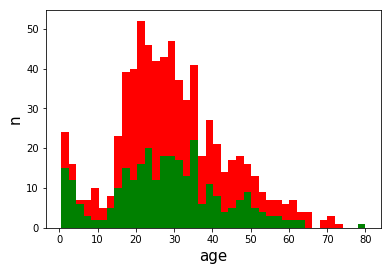

In [9]:
n_bins = 40
fig, ax = plt.subplots(1, 1)
all_n, all_bins, all_patches = ax.hist(train['Age'].dropna(), bins=n_bins, color='r')
svd_n, svd_bins, svd_patches = ax.hist(train.loc[train['Survived']==1, 'Age'].dropna(), bins=n_bins, color='g')
_ = ax.set_ylabel("n", size=15)
_ = ax.set_xlabel("age", size=15)

- 然后再看一下年龄和存活率的关系
- 最右侧的最高点由于样本过少没有参考价值，从整体看，儿童的存活率高于成年人，但还可以作更细致的划分（见后）

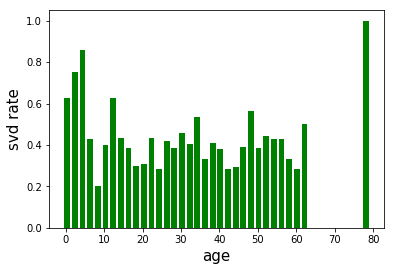

In [10]:
svd_rate = svd_n/all_n
fig, ax = plt.subplots(1, 1)
_ = ax.bar(all_bins[:-1], svd_rate, width=1.5, color="g")
_ = ax.set_ylabel("svd rate", size=15)
_ = ax.set_xlabel("age", size=15)

### SibSp 兄弟姐妹和配偶（在船上的同辈亲属总数）
- 分组结果显示有较强的相关性

In [11]:
train['SibSp'].value_counts()   # 各组的总人数
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()    #各组的存活率

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Parch 在船上的父母和子女总数
- 同上

In [12]:
train['Parch'].value_counts()   # 各组的总人数
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()   # 各组的存活率

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### Ticket  船票编号
- 船票编号暂时没有发现有什么特征

In [13]:
train['Ticket'].unique().size
train['Ticket'].head(10)

681

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

### Fare 票价
- 查看各个票价区间的人数及相应存活的人数
- 结果较为显著，票价越高存活率越高

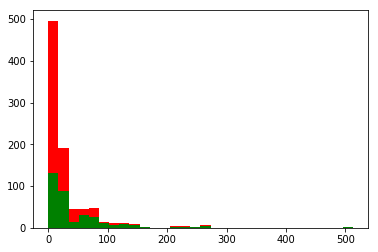

In [14]:
n_bins = 30
fig, ax = plt.subplots(1, 1)
_ = ax.hist(train['Fare'], bins=n_bins, color='r')
_ = ax.hist(train.loc[train['Survived']==1, 'Fare'], bins=n_bins, color='g')

### Cabin  船舱编号
- 这个特征数据缺失了将近80%的数据，而且船舱的等级会体现在票价和船票的等级上，所以这个特征丢弃不用

In [15]:
train['Cabin'].count()/891
test['Cabin'].count()/418

0.22895622895622897

0.21770334928229665

### Embarked  登船港口

- 这上船的港口和存活率也有较强的相关性，应该是这三个地方的经济情况不一样，我们可以验证一下
- 结果如下，C港口的人平均票价和存活率明显高于另外两个地方，至于Q、S港口没有符合猜想，可能是因为Q港口的人比较少导致偶然误差比较大

In [16]:
# 各个港口登船的人数及相应的存活率
train['Embarked'].value_counts()
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

# 看一下登船港口的平均票价
train[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


,Embarked,Fare
0,C,59.954144
1,Q,13.276030
2,S,27.079812


## 先实现一个简单的预测模型

In [17]:
# 将字符型数据转换成数值型数据，这里顺便也把测试集也转换
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)

# 选取特征
quick_feature = ['Pclass', 'Sex']

In [18]:
np.random.seed(20180818)

Qtest_n = 630
# 打乱数据
train = train.sample(frac = 1.0)
train = train.reset_index()

# 切分数据
X_train = train.loc[0:Qtest_n, quick_feature].values
y_train = train.loc[0:Qtest_n, 'Survived'].astype(int).values
X_Qtest = train.loc[Qtest_n+1:891, quick_feature].values
y_Qtest = train.loc[Qtest_n+1:891, 'Survived'].astype(int).values

In [19]:
from sklearn import linear_model, svm

lgr = linear_model.LogisticRegression()
svc = svm.SVC()

for clf in lgr, svc:
    _ = clf.fit(X_train, y_train)
    y_ = clf.predict(X_Qtest)
    clf.score(X_Qtest, y_Qtest)

0.78846153846153844

0.78846153846153844

- 简单预测器的准确率为79%左右

## 结果分析

### 4.1 正确率究竟是多少
- 虽然一下子就得到了结果，但一定要冷静，需要分析这个正确率究竟是怎样的
- 为什么说这个呢，举个很简单的例子：
> 假设一个识别中国人民族的算法，它不用训练，拿到数据直接输出汉族，准确率也能到92%，但这样的算法能信吗？
- 我们先看一下如果全部预测死亡，正确率有多少

In [20]:
1 - y_Qtest.sum()/y_Qtest.size

0.65769230769230769

- 全蒙死亡， 预测正确率是0.6577，说明我们的学习算法还是有点料子的，接下来我们要精确评价我们的预测性能
- 通过计算真阳性率（灵敏度）和真阴性率（特异度），看看咱们的正确率究竟几分是真的
> - 真阳性率（True Positive Rate）：真正活着的人中预测存活的比例
> - 真阴性率（True Negative Rate）：真正去世的人中预测死亡的比例
- 约登指数可以评价整体的预测性能
> - 约登（Youden）指数：真阳性率 + 真阴性率 - 1  

In [21]:
# 1 & 1 =1    1 | 1 = 1
# 1 & 0 =0    1 | 0 = 1
# 0 & 1 =0    0 | 1 = 1
# 0 & 0 =0    0 | 0 = 0
Qtest_svd = y_Qtest.sum()
Qtest_die = y_Qtest.size - y_Qtest.sum()
TPR = (y_ & y_Qtest).sum() / Qtest_svd
TNR = (y_Qtest.size - (y_ | y_Qtest).sum()) / Qtest_die
print("survived : {0} \t TPR : {1:.4f}".format(Qtest_svd, TPR))
print("    dead : {0} \t TNR : {1:.4f}".format(Qtest_die, TNR))
print("Yd_index : {0:.4f}".format(TPR+TNR-1))

survived : 89 	 TPR : 0.7303
    dead : 171 	 TNR : 0.8187
Yd_index : 0.5491


## 完善模型

### 简单预测系统存在的问题及相应的改进方向
- 第一个是预测正确率不高，而且灵敏度与特异度差异有点大
- 特征变量过少，因为前面有一些明显相关的特征变量并没有选入，所以需要增加特征变量

### 补全数据
- 在前面已经看到了各个特征的整体情况，有几个特征变量数据有缺失，所以先要补全数据
- 其中年龄缺失的比较多，就按已有年龄的分布进行填充，Fare和Embarked缺失数据都在个位数，就直接以均值或众数填充，Cabin暂时放弃

In [22]:
np.random.seed(20180818)

for data in train, test:
    # 这里去除掉NaN，并将年龄转换成整数，得到一列包含已有年龄的数组
    age_list = (data['Age'].dropna() + 0.5).astype(int)    
    
    # 从已有年龄中随机抽取相应个数的年龄
    fillage = []                                         
    for i in range(len(data['Age']) - data['Age'].count()):
        fillage.append(int(np.random.choice(age_list.values, 1)))

    # 补全数据，因为Fare和Embarked都是极个别数据缺失，就直接以均值和众数进行补全
    data['Age'][pd.isna(data['Age'])] = fillage
    data['Fare'][pd.isna(data['Fare'])] = data['Fare'].mean()
    data['Embarked'][pd.isna(data['Embarked'])] = 'S'

### Age分组
- 年龄数据已经补全，年龄与存活率的相关性不够显著，可以选择重新分组
- 这里尝试两种分组的方式，按年龄或人数分组

In [23]:
# 按年龄分组
for n in range(2, 10):
    train['SortAge'] = pd.cut(train['Age'], n)
    train[['SortAge', 'Survived']].groupby(['SortAge'], as_index=False).mean()

,SortAge,Survived
0,"(0.34, 40.21]",0.388652
1,"(40.21, 80.0]",0.365591


,SortAge,Survived
0,"(0.34, 26.947]",0.379653
1,"(26.947, 53.473]",0.401869
2,"(53.473, 80.0]",0.283333


,SortAge,Survived
0,"(0.34, 20.315]",0.419643
1,"(20.315, 40.21]",0.374220
2,"(40.21, 60.105]",0.396226
3,"(60.105, 80.0]",0.185185


,SortAge,Survived
0,"(0.34, 16.336]",0.504202
1,"(16.336, 32.252]",0.349206
2,"(32.252, 48.168]",0.388889
3,"(48.168, 64.084]",0.439024
4,"(64.084, 80.0]",0.066667


,SortAge,Survived
0,"(0.34, 13.683]",0.541176
1,"(13.683, 26.947]",0.336478
2,"(26.947, 40.21]",0.400662
3,"(40.21, 53.473]",0.404762
4,"(53.473, 66.737]",0.326531
5,"(66.737, 80.0]",0.090909


,SortAge,Survived
0,"(0.34, 11.789]",0.525000
1,"(11.789, 23.157]",0.334746
2,"(23.157, 34.526]",0.381625
3,"(34.526, 45.894]",0.395349
4,"(45.894, 57.263]",0.426829
5,"(57.263, 68.631]",0.333333
6,"(68.631, 80.0]",0.090909


,SortAge,Survived
0,"(0.34, 10.368]",0.555556
1,"(10.368, 20.315]",0.355263
2,"(20.315, 30.263]",0.338983
3,"(30.263, 40.21]",0.430108
4,"(40.21, 50.158]",0.380952
5,"(50.158, 60.105]",0.425926
6,"(60.105, 70.052]",0.222222
7,"(70.052, 80.0]",0.111111


,SortAge,Survived
0,"(0.34, 9.262]",0.571429
1,"(9.262, 18.104]",0.405941
2,"(18.104, 26.947]",0.310345
3,"(26.947, 35.789]",0.403670
4,"(35.789, 44.631]",0.374046
5,"(44.631, 53.473]",0.443038
6,"(53.473, 62.316]",0.350000
7,"(62.316, 71.158]",0.142857
8,"(71.158, 80.0]",0.166667


In [24]:
# 按人数分组
for n in range(2, 10):
    train['SortAge'] = pd.qcut(train['Age'], n)
    train[['SortAge', 'Survived']].groupby(['SortAge'], as_index=False).mean()

,SortAge,Survived
0,"(0.419, 28.0]",0.376623
1,"(28.0, 80.0]",0.391608


,SortAge,Survived
0,"(0.419, 22.0]",0.386667
1,"(22.0, 34.0]",0.379195
2,"(34.0, 80.0]",0.385666


,SortAge,Survived
0,"(0.419, 20.0]",0.419643
1,"(20.0, 28.0]",0.336134
2,"(28.0, 38.0]",0.408654
3,"(38.0, 80.0]",0.375566


,SortAge,Survived
0,"(0.419, 19.0]",0.446078
1,"(19.0, 25.0]",0.294798
2,"(25.0, 31.0]",0.372671
3,"(31.0, 41.0]",0.420765
4,"(41.0, 80.0]",0.370588


,SortAge,Survived
0,"(0.419, 18.0]",0.473684
1,"(18.0, 22.0]",0.271318
2,"(22.0, 28.0]",0.358025
3,"(28.0, 34.0]",0.404412
4,"(34.0, 43.0]",0.400000
5,"(43.0, 80.0]",0.371622


,SortAge,Survived
0,"(0.419, 17.0]",0.500000
1,"(17.0, 21.0]",0.276423
2,"(21.0, 26.0]",0.356164
3,"(26.0, 30.0]",0.353448
4,"(30.0, 36.0]",0.460317
5,"(36.0, 45.0]",0.362903
6,"(45.0, 80.0]",0.368852


,SortAge,Survived
0,"(0.419, 16.0]",0.504202
1,"(16.0, 20.0]",0.323810
2,"(20.0, 24.0]",0.330709
3,"(24.0, 28.0]",0.342342
4,"(28.0, 32.0]",0.408163
5,"(32.0, 38.0]",0.409091
6,"(38.0, 47.0]",0.347826
7,"(47.0, 80.0]",0.405660


,SortAge,Survived
0,"(0.419, 16.0]",0.504202
1,"(16.0, 19.0]",0.364706
2,"(19.0, 22.0]",0.260417
3,"(22.0, 26.0]",0.359223
4,"(26.0, 30.0]",0.353448
5,"(30.0, 34.0]",0.443038
6,"(34.0, 40.0]",0.420561
7,"(40.0, 48.0]",0.348315
8,"(48.0, 80.0]",0.381443


- 两种分组的结果中能看出，单纯地按人数或者年龄来分组表现得都不让人满意，所以也可以尝试一下手动分组
- 这些分组方式都试一下，后面看看那个效果最好
- 第一种：按年龄分，由于将近90%的人都在50岁以前，所以组数不能太多，而且需要重点关注50岁以前的组别之间的差异度，那么上面分6组表现不错
- 第二种：按人数分，从上面结果看可以分5组
- 第三种：手动分，从上面结果可以按年龄0-17、17-21、21-30、30-36、36-80分5组

In [25]:
for data in train, test:
    data['SortAge_1'] = 0
    data['SortAge_2'] = 0
    data['SortAge_3'] = 0
    # SortAge_1
    data.loc[data['Age'] <= 14, 'SortAge_1'] = 0
    data.loc[(data['Age'] > 14) & (data['Age'] <= 27), 'SortAge_1'] = 1
    data.loc[(data['Age'] > 27) & (data['Age'] <= 40), 'SortAge_1'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] <= 53), 'SortAge_1'] = 3
    data.loc[(data['Age'] > 53) & (data['Age'] <= 66), 'SortAge_1'] = 4
    data.loc[ data['Age'] > 66, 'SortAge_1'] = 5
    # SortAge_2
    data.loc[data['Age'] <= 19, 'SortAge_2'] = 0
    data.loc[(data['Age'] > 19) & (data['Age'] <= 25), 'SortAge_2'] = 1
    data.loc[(data['Age'] > 25) & (data['Age'] <= 31), 'SortAge_2'] = 2
    data.loc[(data['Age'] > 31) & (data['Age'] <= 41), 'SortAge_2'] = 3
    data.loc[ data['Age'] > 41, 'SortAge_2'] = 4
    # SortAge_3
    data.loc[data['Age'] <= 17, 'SortAge_3'] = 0
    data.loc[(data['Age'] > 17) & (data['Age'] <= 21), 'SortAge_3'] = 1
    data.loc[(data['Age'] > 21) & (data['Age'] <= 30), 'SortAge_3'] = 2
    data.loc[(data['Age'] > 30) & (data['Age'] <= 36), 'SortAge_3'] = 3
    data.loc[ data['Age'] > 36, 'SortAge_3'] = 4

In [26]:
train['SortAge_3'].value_counts()
train[['SortAge_3', 'Survived']].groupby(['SortAge_3'], as_index=False).mean()

2    262
4    246
0    134
3    126
1    123
Name: SortAge_3, dtype: int64

,SortAge_3,Survived
0,0,0.500000
1,1,0.276423
2,2,0.354962
3,3,0.460317
4,4,0.365854


- 手动分组效果不错，各组间有明显的差异，而且各组人数也够多

### SibSp、Parch
- 前面已经输出过SibSp和Parch的各类存活率，现在进行组合获取更优的特征
- SibSp中从各组人数及相应的存活率来看，基本可以按有、无SibSp分两组进行处理
- Parch中从各组人数及相应的存活率来看，也可以按有、无Parch分两组进行处理
- 这样的话其实我们也可以把这两个加起来，按有没有亲属分成两组

In [27]:
train['had_SibSp'] = 0
train['had_Parch'] = 0
train.loc[train['SibSp'] >0, 'had_SibSp'] = 1
train.loc[train['Parch'] >0, 'had_Parch'] = 1

train[['had_SibSp', 'Survived']].groupby(['had_SibSp'], as_index=False).mean()
train[['had_Parch', 'Survived']].groupby(['had_Parch'], as_index=False).mean()

,had_SibSp,Survived
0,0,0.345395
1,1,0.466431


,had_Parch,Survived
0,0,0.343658
1,1,0.511737


In [28]:
train['FamilySize'] = train['SibSp'] + train['Parch']
train['IsAlone'] = 0
train.loc[train['FamilySize'] >0, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


- 结果证明按是否有家属来分组处理效果更好一些，那么我们的测试数据也要进行相应的处理

In [29]:
test['FamilySize'] = test['SibSp'] + test['Parch']
test['IsAlone'] = 0
test.loc[test['FamilySize'] >0, 'IsAlone'] = 1

### Fare

- 和年龄一样，我们也是金额和人数两种分组都试一下

In [30]:
for n in range(2, 11):
    train['SortFare'] = pd.cut(train['Fare'], n)
    train[['SortFare', 'Survived']].groupby(['SortFare'], as_index=False).mean()

,SortFare,Survived
0,"(-0.512, 256.165]",0.379819
1,"(256.165, 512.329]",0.777778


,SortFare,Survived
0,"(-0.512, 170.776]",0.376579
1,"(170.776, 341.553]",0.647059
2,"(341.553, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 85.388]",0.352727
1,"(85.388, 170.776]",0.804348
2,"(170.776, 256.165]",0.636364
3,"(256.165, 341.553]",0.666667
4,"(341.553, 426.941]",NaN
5,"(426.941, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 73.19]",0.339670
1,"(73.19, 146.38]",0.732394
2,"(146.38, 219.57]",0.733333
3,"(219.57, 292.76]",0.615385
4,"(292.76, 365.949]",NaN
5,"(365.949, 439.139]",NaN
6,"(439.139, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 64.041]",0.337646
1,"(64.041, 128.082]",0.662500
2,"(128.082, 192.123]",0.777778
3,"(192.123, 256.165]",0.636364
4,"(256.165, 320.206]",0.666667
5,"(320.206, 384.247]",NaN
6,"(384.247, 448.288]",NaN
7,"(448.288, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 56.925]",0.332021
1,"(56.925, 113.851]",0.655172
2,"(113.851, 170.776]",0.818182
3,"(170.776, 227.702]",0.666667
4,"(227.702, 284.627]",0.625000
5,"(284.627, 341.553]",NaN
6,"(341.553, 398.478]",NaN
7,"(398.478, 455.404]",NaN
8,"(455.404, 512.329]",1.000000


,SortFare,Survived
0,"(-0.512, 51.233]",0.318306
1,"(51.233, 102.466]",0.660377
2,"(102.466, 153.699]",0.741935
3,"(153.699, 204.932]",1.000000
4,"(204.932, 256.165]",0.636364
5,"(256.165, 307.398]",0.666667
6,"(307.398, 358.63]",NaN
7,"(358.63, 409.863]",NaN
8,"(409.863, 461.096]",NaN
9,"(461.096, 512.329]",1.000000


In [31]:
for n in range(2, 11):
    train['SortFare'] = pd.qcut(train['Fare'], n)
    train[['SortFare', 'Survived']].groupby(['SortFare'], as_index=False).mean()

,SortFare,Survived
0,"(-0.001, 14.454]",0.250559
1,"(14.454, 512.329]",0.518018


,SortFare,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


,SortFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


,SortFare,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


,SortFare,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


,SortFare,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 8.05]",0.200000
2,"(8.05, 12.475]",0.316327
3,"(12.475, 19.258]",0.406250
4,"(19.258, 27.9]",0.445312
5,"(27.9, 56.929]",0.456000
6,"(56.929, 512.329]",0.685039


,SortFare,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


,SortFare,Survived
0,"(-0.001, 7.733]",0.141414
1,"(7.733, 7.896]",0.241935
2,"(7.896, 8.662]",0.200000
3,"(8.662, 13.0]",0.375000
4,"(13.0, 16.7]",0.382353
5,"(16.7, 26.0]",0.450000
6,"(26.0, 35.111]",0.432990
7,"(35.111, 73.5]",0.485149
8,"(73.5, 512.329]",0.762887


,SortFare,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


- 这里可以看出按金额分组的效果很差，按人数来分组效果还不错，其中分成2、3、4组都有不错的表现
- test集Fare缺了一个数据，所以先补齐

In [32]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
for data in train, test:
    data['SortFare_2'] = 0
    data['SortFare_3'] = 0
    data['SortFare_4'] = 0
    # SortFare_2
    data.loc[data['Fare'] <= 14.45, 'SortFare_2'] = 0
    data.loc[ data['Fare'] > 14.45, 'SortFare_2'] = 1
    # SortFare_3
    data.loc[data['Fare'] <= 8.66, 'SortFare_3'] = 0
    data.loc[(data['Fare'] > 8.66) & (data['Fare'] <= 26), 'SortFare_3'] = 1
    data.loc[ data['Fare'] > 26, 'SortFare_3'] = 2
    # SortFare_4
    data.loc[data['Fare'] <= 7.91, 'SortFare_4'] = 0
    data.loc[(data['Fare'] > 7.91)  & (data['Fare'] <= 14.45), 'SortFare_4'] = 1
    data.loc[(data['Fare'] > 14.45) & (data['Fare'] <= 31), 'SortFare_4'] = 2
    data.loc[ data['Fare'] > 31, 'SortFare_4'] = 3

### Embarked

- Embarked数据有若干个缺失，直接用众数'S'补全即可
- 而且在初步探索中已经看到了三组的存活率的差异，这里直接将字符转换成数值数据就可以了

In [33]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

train['Embarked'].count()
test['Embarked'].count()

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

891

418

### 再次检查数据，除Cabin外数据已经齐全

In [34]:
for data in train, test:
    data.describe()
    data.describe(include=[np.object, 'category'])

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SortAge_1,SortAge_2,SortAge_3,had_SibSp,had_Parch,FamilySize,IsAlone,SortFare_2,SortFare_3,SortFare_4
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,0.647587,29.712873,0.523008,0.381594,32.204208,0.361392,1.703704,1.934905,2.25477,0.317621,0.239057,0.904602,0.397306,0.506173,1.0000,1.505051
std,257.353842,257.353842,0.486592,0.836071,0.477990,14.464168,1.102743,0.806057,49.693429,0.635673,1.083989,1.441061,1.38660,0.465813,0.426747,1.613459,0.489615,0.500243,0.8142,1.118148
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.500000
50%,445.000000,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0000,2.000000
75%,667.500000,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,3.000000,4.00000,1.000000,0.000000,1.000000,1.000000,1.000000,2.0000,2.000000
max,890.000000,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,5.000000,4.000000,4.00000,1.000000,1.000000,10.000000,1.000000,1.000000,2.0000,3.000000


,Name,Ticket,Cabin,SortAge,SortFare
count,891,891,204,891,891
unique,891,681,147,9,10
top,"Brown, Miss. Amelia ""Mildred""",CA. 2343,B96 B98,"(0.419, 16.0]","(7.854, 8.05]"
freq,1,7,4,119,106


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SortAge_1,SortAge_2,SortAge_3,FamilySize,IsAlone,SortFare_2,SortFare_3,SortFare_4
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.139952,0.447368,0.392344,35.627188,0.464115,1.703349,1.959330,2.284689,0.839713,0.394737,0.504785,0.985646,1.492823
std,120.810458,0.841838,0.481622,14.036677,0.896760,0.981429,55.840500,0.685516,1.076471,1.402557,1.342107,1.519072,0.489380,0.500576,0.804534,1.148953
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000,2.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,5.000000,4.000000,4.000000,10.000000,1.000000,1.000000,2.000000,3.000000


,Name,Ticket,Cabin
count,418,418,91
unique,418,363,76
top,"Rosenshine, Mr. George (Mr George Thorne"")""",PC 17608,B57 B59 B63 B66
freq,1,5,3


## 训练模型

In [35]:
np.random.seed(2018082401)

# 打乱数据
train = train.sample(frac = 1.0)
train = train.reset_index()
train = train.drop(columns=['index'])

# 切分数据
train_n = 630
X_train = train.loc[0:train_n, :]
y_train = train.loc[0:train_n, 'Survived'].astype(int)
X_cv = train.loc[train_n+1:891, :]
y_cv = train.loc[train_n+1:891, 'Survived'].astype(int)

base_feature = ['Pclass', 'Sex', 'IsAlone', 'Embarked']

### 选择算法

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

clf_set = [ KNeighborsClassifier(),
            SVC(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis(),
            LogisticRegression()]

bf = base_feature
for clf in clf_set:
    _ = clf.fit(X_train[bf].values, y_train.values)
    print("{0:>30s} : {1:<.4f}".format(clf.__class__.__name__, clf.score(X_cv[bf].values, y_cv.values)))

          KNeighborsClassifier : 0.7654
                           SVC : 0.8231
        DecisionTreeClassifier : 0.7769
        RandomForestClassifier : 0.7769
            AdaBoostClassifier : 0.7885
    GradientBoostingClassifier : 0.7808
                    GaussianNB : 0.7731
    LinearDiscriminantAnalysis : 0.7962
 QuadraticDiscriminantAnalysis : 0.7769
            LogisticRegression : 0.7962


- 准确率比之前有了提升

### 确定Age和Fare哪种分组比较适合

In [37]:
sortage_set = ['SortAge_1', 'SortAge_2', 'SortAge_3']
for sortage in sortage_set:
    af = ['Pclass', 'Sex', 'IsAlone', 'Embarked']
    af.append(sortage)
    print("{:>41s}".format(sortage))
    for clf in clf_set:
        _ = clf.fit(X_train[af].values, y_train.values)
        print("{0:>30s} : {1:7.4f}".format(clf.__class__.__name__, clf.score(X_cv[af].values, y_cv.values)))

                                SortAge_1
          KNeighborsClassifier :  0.7731
                           SVC :  0.7923
        DecisionTreeClassifier :  0.8192
        RandomForestClassifier :  0.7769
            AdaBoostClassifier :  0.8154
    GradientBoostingClassifier :  0.8115
                    GaussianNB :  0.7846
    LinearDiscriminantAnalysis :  0.8154
 QuadraticDiscriminantAnalysis :  0.8000
            LogisticRegression :  0.8269
                                SortAge_2
          KNeighborsClassifier :  0.7846
                           SVC :  0.8038
        DecisionTreeClassifier :  0.7808
        RandomForestClassifier :  0.7923
            AdaBoostClassifier :  0.8077
    GradientBoostingClassifier :  0.8115
                    GaussianNB :  0.7731
    LinearDiscriminantAnalysis :  0.8038
 QuadraticDiscriminantAnalysis :  0.7923
            LogisticRegression :  0.8038
                                SortAge_3
          KNeighborsClassifier :  0.8154
             

In [38]:
sortfare_set = ['SortFare_2', 'SortFare_3', 'SortFare_4']
for sortfare in sortfare_set:
    ff = ['Pclass', 'Sex', 'IsAlone', 'Embarked']
    ff.append(sortfare)
    print("{:>41s}".format(sortfare))
    for clf in clf_set:
        _ = clf.fit(X_train[ff].values, y_train.values)
        print("{0:>30s} : {1:7.4f}".format(clf.__class__.__name__, clf.score(X_cv[ff].values, y_cv.values)))

                               SortFare_2
          KNeighborsClassifier :  0.7692
                           SVC :  0.8000
        DecisionTreeClassifier :  0.7731
        RandomForestClassifier :  0.7654
            AdaBoostClassifier :  0.7885
    GradientBoostingClassifier :  0.7808
                    GaussianNB :  0.7846
    LinearDiscriminantAnalysis :  0.7962
 QuadraticDiscriminantAnalysis :  0.7808
            LogisticRegression :  0.7962
                               SortFare_3
          KNeighborsClassifier :  0.7692
                           SVC :  0.8038
        DecisionTreeClassifier :  0.7769
        RandomForestClassifier :  0.7846
            AdaBoostClassifier :  0.7885
    GradientBoostingClassifier :  0.8077
                    GaussianNB :  0.7769
    LinearDiscriminantAnalysis :  0.7962
 QuadraticDiscriminantAnalysis :  0.7846
            LogisticRegression :  0.7962
                               SortFare_4
          KNeighborsClassifier :  0.7269
             

- 走到这其实发现数据的偶然性偏差已经对算法有影响了，虽然在这上面看到效果还不错，但是尝试着多改变几次前面切分数据的随机种子，就会发现后面的训练结果都会波动，各种分组方式并不能准确地判断优劣
- 其中SVC（支持向量机）的score平均值最佳